The use of deep learning in tabular data was not a new idea. People have been using fully-connected neural networks for these data for the longest time but it came with a few disadvantages;

Large amount of data needed for neural networks
Insignificant gains in model’s performance compared to more popular machine learning algorithms (e.g Random forest, Gradient boosting trees)
Lack of interpretability
As such, using deep learning for tabular data never really took off. This is true until practitioners transfer the idea of embedding networks used in Natural Language Processing (NLP) to tabular data.

This is how it works.

Traditionally, categorical variables such as ‘Gender’ or ‘Race’ were processed using One-hot encoding, where each entity in the variable was given a unique column to track the presence of the entity.

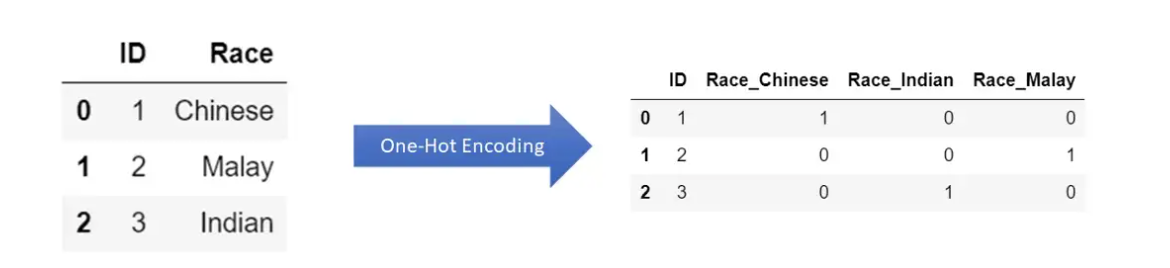

This method, although convert the data into a suitable format for machine learning algorithms, it assumes independence among entity and results in sparse matrices.

Entity embedding on the other hands uses a vector to represent each entity instead of a binary value. This has a few advantages;

Remove the sparse matrices problem of inefficient computation
Produce vectors that show the relationship between each entity (derive additional insights instead of treating them as independent)
 The dataset WE WILL use is the IEEE-CIS Fraud Detection data from Kaggle which you can find [here](https://www.kaggle.com/c/ieee-fraud-detection).

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
# define the neural networks
from tensorflow.keras.layers import Input, Embedding, Dense, Reshape, Concatenate, Dropout, BatchNormalization
from tensorflow.keras import Model

In [2]:
# train = pd.read_csv("Data/train_transaction.csv")
# test = pd.read_csv("Data/test_transaction.csv")

As data exploration and feature engineering is not the purpose of this post, I will use minimum features to predict the fraud label. To make sure you can replicate my code, here are my processing steps.

After the processing steps have been done, now we can convert the categorical variables into integers.

Due to the higly imbalanced dataset, I have to artificially generate more fraud data using a technique called Synthetic Minority Over-sampling Technique (SMOTE). The documentation can be found here.



Finally, we can work on modelling the data. This implementation of the entity embedding took the idea and best practices from Jeremy Howard’s [‘Introduction to Machine Learning for Coders’](https://course18.fast.ai/ml) course. Hence, many of the technical specifics such as embedding sizes and hidden layers were selected by Jeremy through his research and experiences. Anyway, if you have not seen the course, I highly recommend you take the course and listen to Jeremy approach to machine learning. It is completely free too.

Now to define the neural networks. The architecture of the networks is simply the concatenation of continuous variables with embedding layers for each categorical variables.

Now initialize the model.


Process the input for the neural networks.


Train the model.


Making prediction.


Lastly, let's rank the solution using ROC-AUC.


Not that bad for a model using only some of the features.

This is it. Using entity embedding for Kaggle tabular data competition. Hope you enjoy it.
